In [257]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
covid_file = pd.ExcelFile('C:/Users/DELL/COVID 19 Growth study.xlsx')

In [259]:
pd.set_option("display.max_rows",10)

In [260]:
china=covid_file.parse('Sheet4', skiprows=2)

In [261]:
display(china.head()) # will display the top 5 rows

,Day,Date,Total Cases
0,1,2020-01-14,41
1,2,2020-01-15,41
2,3,2020-01-16,41
3,4,2020-01-17,41
4,5,2020-01-18,41


In [262]:
display(china)

,Day,Date,Total Cases
0,1,2020-01-14,41
1,2,2020-01-15,41
2,3,2020-01-16,41
3,4,2020-01-17,41
4,5,2020-01-18,41
...,...,...,...
69,70,2020-03-23,81054
70,71,2020-03-24,81093
71,72,2020-03-25,81171
72,73,2020-03-26,81218


In [263]:
xdata= pd.DataFrame(china[["Day"]])
ydata= pd.DataFrame(china[["Total Cases"]])

In [264]:
#fitting function
def func(x,a,b,c,d,k):
    return k*(a/(1+(np.exp(-b*(x-c)))) + d) #logistic function.

### _The function is:_

<center> $$f(x)= k[{\frac{a}{1+e^{-b(x-c)}}+d}]$$</center>

Text(0,0.5,'No. of cases')

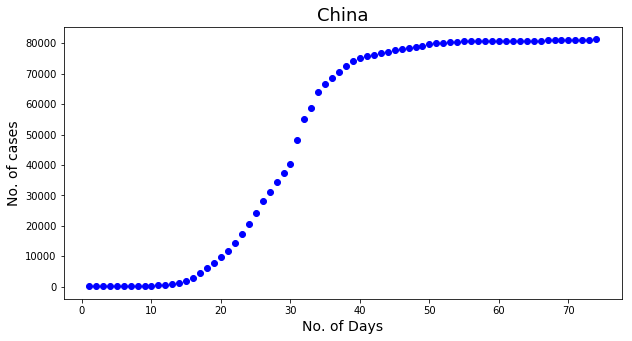

In [265]:
fig1=plt.figure(figsize=(10,5))
sub1= fig1.add_subplot(111)
sub1.plot(xdata, ydata, 'bo')
sub1.set_title("China", fontsize=18)
sub1.set_xlabel("No. of Days",fontsize=14)
sub1.set_ylabel("No. of cases",fontsize=14)

In [266]:
x1=np.array(xdata)
y1= np.array(ydata)

In [267]:
popt, pcov = curve_fit(func, x1.ravel(), y1.ravel()) # .ravel is used to flatten the array
print(popt) #These are the variables of the logistic function; a,b,c,d,k

[ -4.27508002e+02  -2.28824495e-01   2.89405258e+01   4.25162844e+02
   1.89990793e+02]


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [268]:
xFit= np.arange(0.0, 74, 1 )

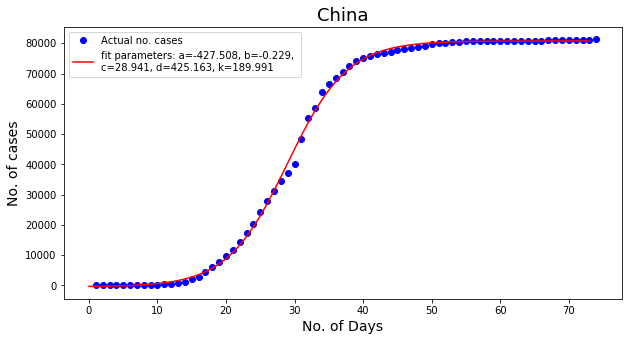

In [270]:
# Plotting the actual no. of cases v/s the logistically fitted no. of cases
fig1=plt.figure(figsize=(10,5))
sub1= fig1.add_subplot(111)
sub1.plot(xdata, ydata, 'bo', label='Actual no. cases')
sub1.set_title("China", fontsize=18)
sub1.set_xlabel("No. of Days",fontsize=14)
sub1.set_ylabel("No. of cases",fontsize=14)
sub1.plot(xFit, func(xFit, *popt), 'r', label='fit parameters: a=%5.3f, b=%5.3f, \nc=%5.3f, d=%5.3f, k=%5.3f ' % tuple(popt))
plt.legend()